In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris

In [98]:
iris = pd.read_csv("Iris.csv")
#iris data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
#number of examples in each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [100]:
# Split the data into features and target
X = iris.iloc[:,1:3]
X=X.values
Y = iris.iloc[:,5:6]
#assign integer value to string
species = {'Iris-setosa': 0,'Iris-virginica': 2, 'Iris-versicolor': 1} 
Y.Species = [species[item] for item in Y.Species] 
Y=Y.Species

C:\Users\Abhishek Kushwaha\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [101]:
# Make a individual class for each species
X_class0 = np.asmatrix([X[i] for i in range(len(X)) if Y[i]==0])
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asmatrix([X[i] for i in range(len(X)) if Y[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)
X_class2 = np.asmatrix([X[i] for i in range(len(X)) if Y[i]==2])
Y_class2 = np.full((X_class2.shape[0]),fill_value=2,dtype=np.int)

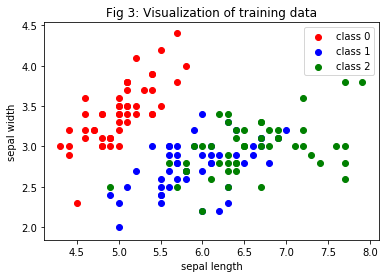

In [102]:
X_class0=np.array(X_class0)
X_class1=np.array(X_class1)
X_class2=np.array(X_class2)
plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.scatter(X_class2[:,0], X_class2[:,1],color='green')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('Fig 3: Visualization of training data')
plt.show()

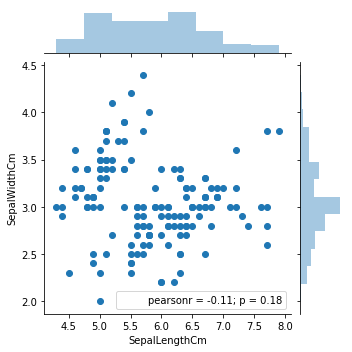

In [103]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms.
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

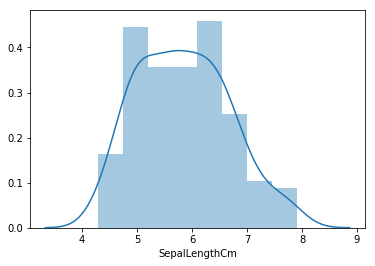

In [104]:
#SepalLengthCm density plot
sns.distplot(iris.SepalLengthCm)
plt.show()

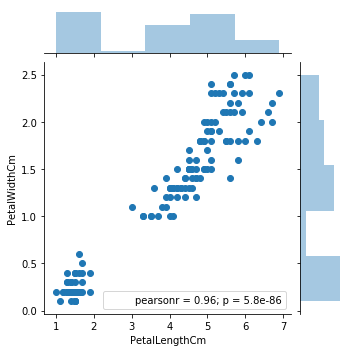

In [105]:
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=iris, size=5)

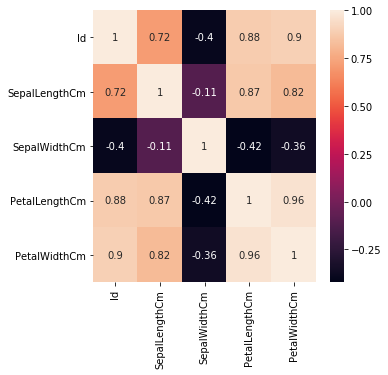

In [106]:
#Heatmap to see correlation of different iris variables
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(iris.corr(),annot=True)
plt.show()

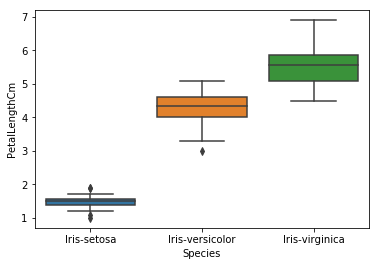

In [107]:
#individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

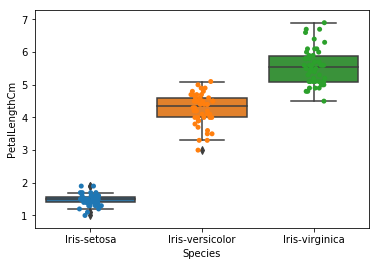

In [108]:
#Now, we adding a layer of individual points on top of it through Seaborns striplots.So we will use Jitter=True so that all 
# points not fall in vertical lines above the species.
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="Black")

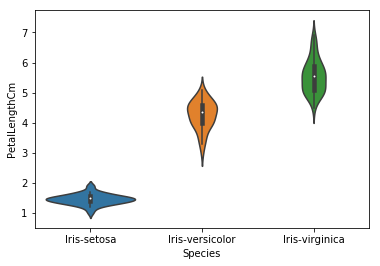

In [109]:
# A violin plot combines the benefits of the previous two plots and simplifies them, Denser regions of the data are fatter, 
# and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

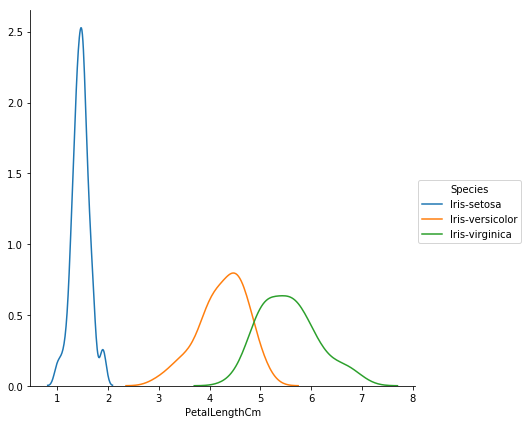

In [110]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot, which creates and visualizes a kernel
# density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

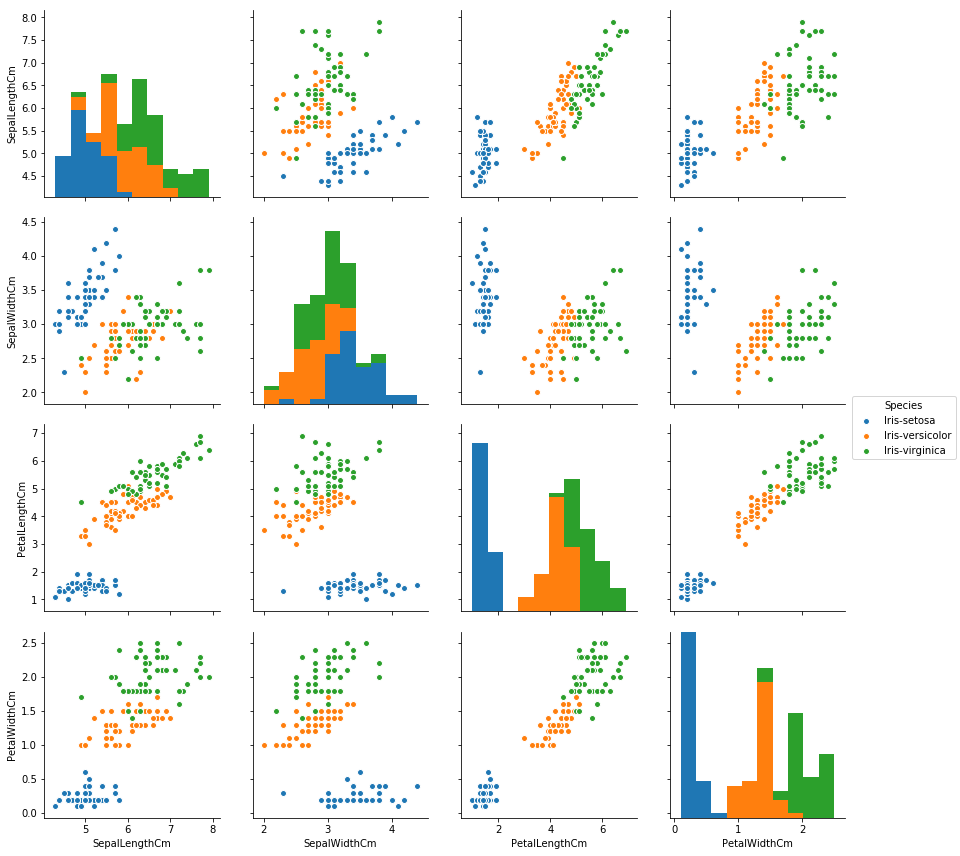

In [ ]:
# It is the pairplot, which shows the bivariate relation between each pair of features
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

In [ ]:
# The diagonal elements in a pairplot show the histogram by default We can update these elements to show other things,
# such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

In [ ]:
#Boxplot grouped by species.
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

In [ ]:
# Now make an Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

In [ ]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

In [ ]:
# It is another multivariate visualization technique pandas has is radviz Which puts each feature as a point on a 2D plane,
# and then simulates having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")